# Analisis Bivariado del Proyecto

In [104]:
# Importamos las librerias a utilizar
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pandas_profiling

In [105]:
print("Importamos y revisamos la data:")
df = pd.read_csv("data_final.csv")
df.head()

Importamos y revisamos la data:


,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


## 1. Revision del DataFrame

### 1.1 Caracteristicas:

In [106]:
print('\033[1m'+f"La data tiene {df.shape[0]} observaciones y {df.shape[1]} variables.")

La data tiene 319795 observaciones y 18 variables.


In [107]:
print('\033[1m'+f"Totalidad de registros por columnas:") 
df.count()

Totalidad de registros por columnas:


HeartDisease        319795
BMI                 319795
Smoking             319795
AlcoholDrinking     319795
Stroke              319795
PhysicalHealth      319795
MentalHealth        319795
DiffWalking         319795
Sex                 319795
AgeCategory         319795
Race                319795
Diabetic            319795
PhysicalActivity    319795
GenHealth           319795
SleepTime           319795
Asthma              319795
KidneyDisease       319795
SkinCancer          319795
dtype: int64

In [108]:
print('\033[1m'+"Revision de datos faltantes:")
df.isnull().any()

Revision de datos faltantes:


HeartDisease        False
BMI                 False
Smoking             False
AlcoholDrinking     False
Stroke              False
PhysicalHealth      False
MentalHealth        False
DiffWalking         False
Sex                 False
AgeCategory         False
Race                False
Diabetic            False
PhysicalActivity    False
GenHealth           False
SleepTime           False
Asthma              False
KidneyDisease       False
SkinCancer          False
dtype: bool

Se observa que no hay datos faltantes.

In [109]:
print('\033[1m'+"Tipo de datos por columna:")
df.dtypes

Tipo de datos por columna:


HeartDisease         object
BMI                 float64
Smoking              object
AlcoholDrinking      object
Stroke               object
PhysicalHealth      float64
MentalHealth        float64
DiffWalking          object
Sex                  object
AgeCategory          object
Race                 object
Diabetic             object
PhysicalActivity     object
GenHealth            object
SleepTime           float64
Asthma               object
KidneyDisease        object
SkinCancer           object
dtype: object

In [110]:
print('\033[1m'+"Principales caracteristicas estadisticas:")
df.describe(include="all")

Principales caracteristicas estadisticas:


,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
count,319795,319795.000000,319795,319795,319795,319795.00000,319795.000000,319795,319795,319795,319795,319795,319795,319795,319795.000000,319795,319795,319795
unique,2,NaN,2,2,2,NaN,NaN,2,2,13,6,4,2,5,NaN,2,2,2
top,No,NaN,No,No,No,NaN,NaN,No,Female,65-69,White,No,Yes,Very good,NaN,No,No,No
freq,292422,NaN,187887,298018,307726,NaN,NaN,275385,167805,34151,245212,269653,247957,113858,NaN,276923,308016,289976
mean,NaN,28.325399,NaN,NaN,NaN,3.37171,3.898366,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.097075,NaN,NaN,NaN
std,NaN,6.356100,NaN,NaN,NaN,7.95085,7.955235,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.436007,NaN,NaN,NaN
min,NaN,12.020000,NaN,NaN,NaN,0.00000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN
25%,NaN,24.030000,NaN,NaN,NaN,0.00000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.000000,NaN,NaN,NaN
50%,NaN,27.340000,NaN,NaN,NaN,0.00000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.000000,NaN,NaN,NaN
75%,NaN,31.420000,NaN,NaN,NaN,2.00000,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.000000,NaN,NaN,NaN


### 1.1 Cambios en el dataframe:
Cambiaremos los valores de la columna "HeartDisease", para facilitar el analisis.
- "No" cambiara a "0"
- "Yes" cambiara a "1"

In [111]:
df["HeartDisease"] = df["HeartDisease"].replace({"No": 0, "Yes": 1})
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,0,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,0,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,0,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,0,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


## 2. Pandas profiling

In [112]:
# Generamos el profiling de la data:
pandas_profiling.ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## 3. Graficos

### 3.1 Heatmap

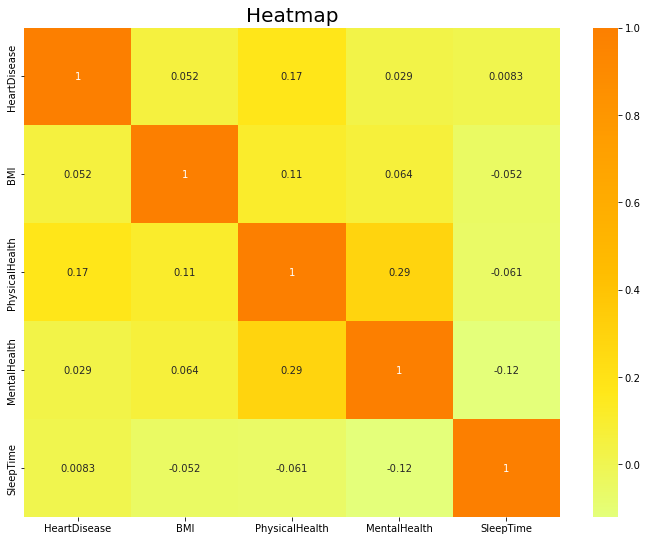

In [113]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot = True, cmap = 'Wistia')
plt.title('Heatmap', fontsize = 20)
plt.show()

### 3.2 Relacion de "HeartDisease" y "Smoking"
Graficaremos a los fumadores y no fumadores de las muestras que tienen enfermedades cardiacas.

Text(0, 0.5, 'Cantidad')

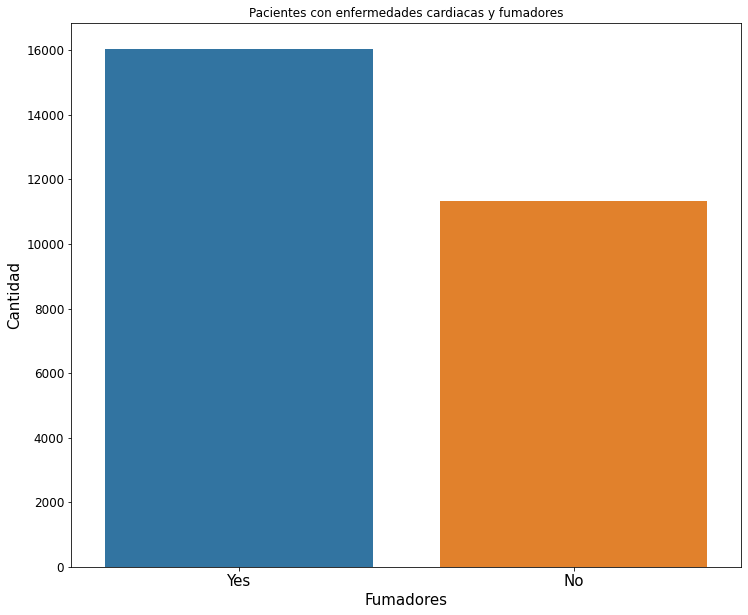

In [114]:
plt.figure(figsize=(12,10))
ax = sns.countplot(data = df['HeartDisease'], x = df["Smoking"][df["HeartDisease"] == 1])
ax.set(title='Pacientes con enfermedades cardiacas y fumadores')
plt.xticks(size = 15)
plt.xlabel("Fumadores", size = 15)
plt.yticks(size = 12)
plt.ylabel("Cantidad", size = 15)

### 3.3 Relacion de "HeartDisease" y "AlcoholDrinking"
Graficaremos a los bebedores y no bebedores de alcohol, de las muestras que tienen enfermedades cardiacas.

Text(0, 0.5, 'Cantidad')

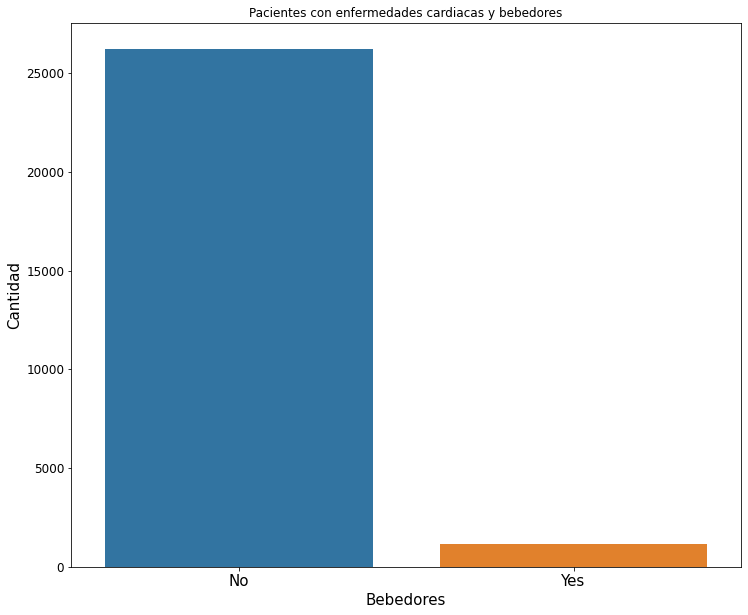

In [115]:
plt.figure(figsize=(12,10))
ax = sns.countplot(data = df, x = df["AlcoholDrinking"][df["HeartDisease"] == 1])
ax.set(title='Pacientes con enfermedades cardiacas y bebedores')
plt.xticks(size = 15)
plt.xlabel("Bebedores", size = 15)
plt.yticks(size = 12)
plt.ylabel("Cantidad", size = 15)

La gran mayoria de los pacientes con enfermedades cardiacas, indican que no son bebedores de alcohol.

### 3.4 Relacion entre "AgeCategory" y "HeartDisease"
Graficaremos la relacion entre la edad de las muestras de enfermedades cardiacas.

Text(0, 0.5, 'Cantidad')

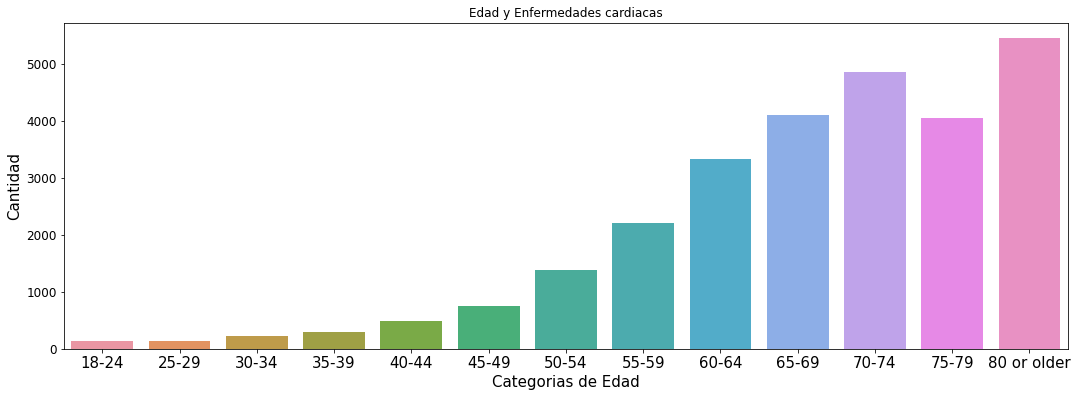

In [116]:
plt.figure(figsize=(18,6))
ax=sns.countplot(data = df, x = df["AgeCategory"][df["HeartDisease"] == 1], order = df['AgeCategory'].value_counts().index.sort_values())
ax.set(title='Edad y Enfermedades cardiacas')
plt.xticks(size = 15)
plt.xlabel("Categorias de Edad", size = 15)
plt.yticks(size = 12)
plt.ylabel("Cantidad", size = 15)